In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
netflix=pd.read_csv('netflix.csv')

In [3]:
netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [4]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
netflix.shape

(8807, 12)

# **1. Un-nesting the columns**

# Unnesting the cast columns into rows

In [6]:
netflix['cast']=netflix['cast'].str.split(',')
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"[Mayur More, Jitendra Kumar, Ranjan Raj, Al...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"[Mark Ruffalo, Jake Gyllenhaal, Robert Downe...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"[Jesse Eisenberg, Woody Harrelson, Emma Ston...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"[Tim Allen, Courteney Cox, Chevy Chase, Kat...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [7]:
netflix=netflix.explode('cast')
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [8]:
netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Dillon Windvogel,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Natasha Thahane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Arno Greeff,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Xolile Tshabalala,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Getmore Sithole,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [9]:
netflix.shape

(64951, 12)

In [10]:
netflix.duplicated()

,0
0,False
1,False
1,False
1,False
1,False
...,...
8806,False
8806,False
8806,False
8806,False


In [11]:
netflix.duplicated().sum()

2

In [12]:
netflix=netflix.drop_duplicates()

In [13]:
netflix.shape

(64949, 12)

In [14]:
netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Dillon Windvogel,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Natasha Thahane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Arno Greeff,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Xolile Tshabalala,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Getmore Sithole,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [15]:
netflix=netflix.reset_index(drop=True)

In [16]:
netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
5,s2,TV Show,Blood & Water,NaN,Dillon Windvogel,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
6,s2,TV Show,Blood & Water,NaN,Natasha Thahane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
7,s2,TV Show,Blood & Water,NaN,Arno Greeff,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
8,s2,TV Show,Blood & Water,NaN,Xolile Tshabalala,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
9,s2,TV Show,Blood & Water,NaN,Getmore Sithole,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


# Unnesting the country columns to rows.

In [17]:
netflix['country']=netflix['country'].str.split(',')
netflix=netflix.explode('country')
netflix=netflix.drop_duplicates()
netflix=netflix.reset_index(drop=True)

# Unnesting the director column into rows.

In [18]:
netflix['director']=netflix['director'].str.split(',')
netflix=netflix.explode('director')
netflix=netflix.drop_duplicates()
netflix=netflix.reset_index(drop=True)

# Unnesting the listed_in column into rows

In [19]:
netflix['listed_in']=netflix['listed_in'].str.split(',')
netflix=netflix.explode('listed_in')
netflix=netflix.drop_duplicates()
netflix=netflix.reset_index(drop=True)

In [20]:
netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
5,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
6,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
7,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
8,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
9,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."


In [21]:
netflix.shape

(202058, 12)

# **2. Handling null values**

In [22]:
netflix.isnull().sum()

,0
show_id,0
type,0
title,0
director,50643
cast,2149
country,11897
date_added,158
release_year,0
rating,67
duration,3


# Replacing null values in director column with 'unknown_director'

In [23]:
netflix['director'].isnull()

,director
0,False
1,True
2,True
3,True
4,True
...,...
202053,False
202054,False
202055,False
202056,False


In [24]:
netflix['director'].fillna('unknown_director',inplace=True)

<ipython-input-24-54afbb19b216>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix['director'].fillna('unknown_director',inplace=True)


In [25]:
netflix['director']

,director
0,Kirsten Johnson
1,unknown_director
2,unknown_director
3,unknown_director
4,unknown_director
...,...
202053,Mozez Singh
202054,Mozez Singh
202055,Mozez Singh
202056,Mozez Singh


In [26]:
netflix['director'].isnull().sum()

0

In [27]:
netflix.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,2149
country,11897
date_added,158
release_year,0
rating,67
duration,3


# Replacing and dropping the null values to clean up the data for analysis

In [28]:
netflix['cast'].fillna('unknown_cast',inplace=True)
netflix['country'].fillna('unknown_country',inplace=True)
netflix['rating'].fillna('unknown_rating',inplace=True)


<ipython-input-28-961b5711984f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix['cast'].fillna('unknown_cast',inplace=True)
<ipython-input-28-961b5711984f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [29]:
netflix.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,158
release_year,0
rating,0
duration,3


In [30]:
netflix.dropna(axis=0,how='any',inplace=True)

In [31]:
netflix.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


# **# 1. Find the counts of each categorical variable both using graphical and non-graphical analysis.**

# a. For Non-graphical Analysis:

In [32]:
netflix['type'].value_counts()

,count
type,
Movie,145907
TV Show,55990


In [33]:
netflix['title'].value_counts()

,count
title,
Kahlil Gibran's The Prophet,700
Holidays,504
Movie 43,468
The Eddy,416
Narcos,378
...,...
The Mitfords: A Tale of Two Sisters,1
Off Camera,1
Jackie: A Tale of Two Sisters,1


In [34]:
netflix['director'].value_counts()

,count
director,
unknown_director,50485
Martin Scorsese,419
Youssef Chahine,409
Cathy Garcia-Molina,356
Steven Spielberg,355
...,...
Reuben Atlas,1
Max Amini,1
Paul Miller,1


In [35]:
netflix['cast'].value_counts()

,count
cast,
unknown_cast,2149
Alfred Molina,160
Salma Hayek,130
Frank Langella,128
John Rhys-Davies,125
...,...
Ron Turner,1
Catharine Pilafas,1
Daniella Alonso,1


In [36]:
netflix['country'].value_counts()

,count
country,
United States,49780
India,22139
unknown_country,11896
United Kingdom,9706
United States,9482
...,...
Samoa,2
Sri Lanka,2
Kazakhstan,1


In [37]:
netflix['rating'].value_counts()

,count
rating,
TV-MA,73883
TV-14,43879
R,25859
PG-13,16246
TV-PG,14913
PG,10919
TV-Y7,6294
TV-Y,3664
TV-G,2779


In [38]:
netflix['listed_in'].value_counts()

,count
listed_in,
International Movies,27138
Dramas,19654
Comedies,13894
Action & Adventure,12216
Dramas,10149
...,...
Stand-Up Comedy,24
Romantic Movies,20
TV Sci-Fi & Fantasy,7


In [39]:
netflix['release_year'].value_counts()

,count
release_year,
2018,24439
2019,21931
2017,20515
2020,19697
2016,18460
...,...
1947,8
1946,6
1942,6


# b. For graphical analysis:

<Axes: xlabel='type', ylabel='count'>

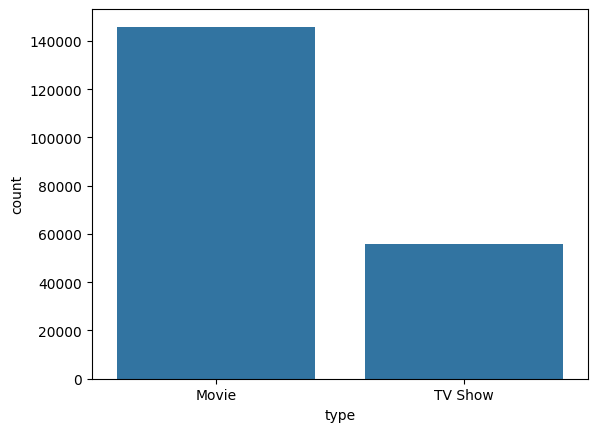

In [40]:
sns.countplot(x='type',data=netflix)

<Axes: xlabel='rating', ylabel='count'>

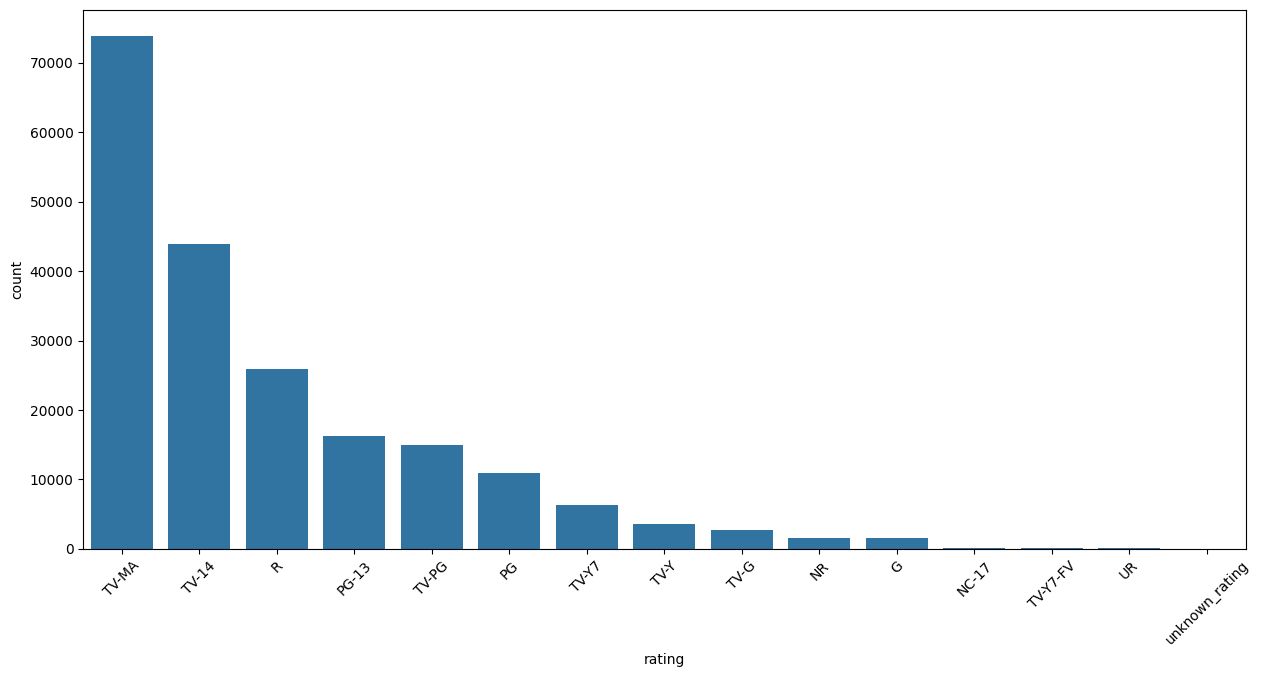

In [41]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45,fontsize=10)
sns.countplot(x='rating',data=netflix,order=netflix['rating'].value_counts().index)

<Axes: xlabel='title', ylabel='count'>

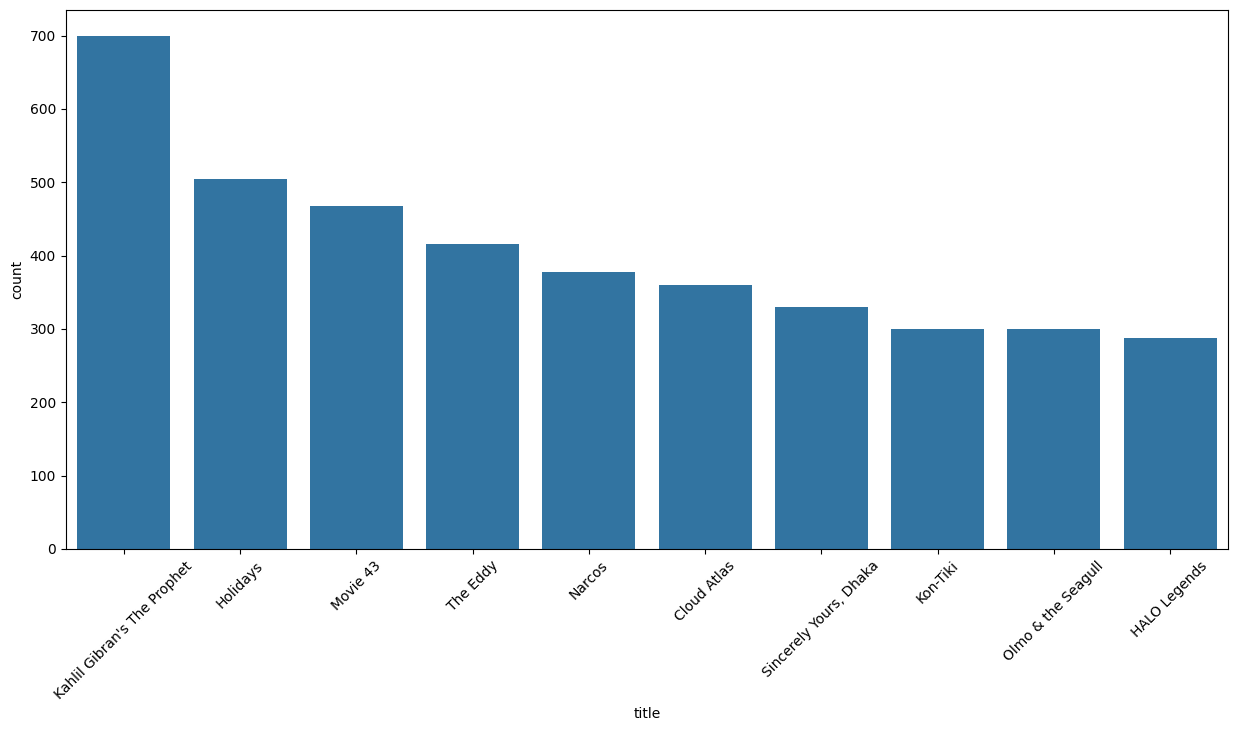

In [42]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45,fontsize=10)
sns.countplot(x='title',data=netflix,order=netflix['title'].value_counts().index[:10])

<Axes: xlabel='director', ylabel='count'>

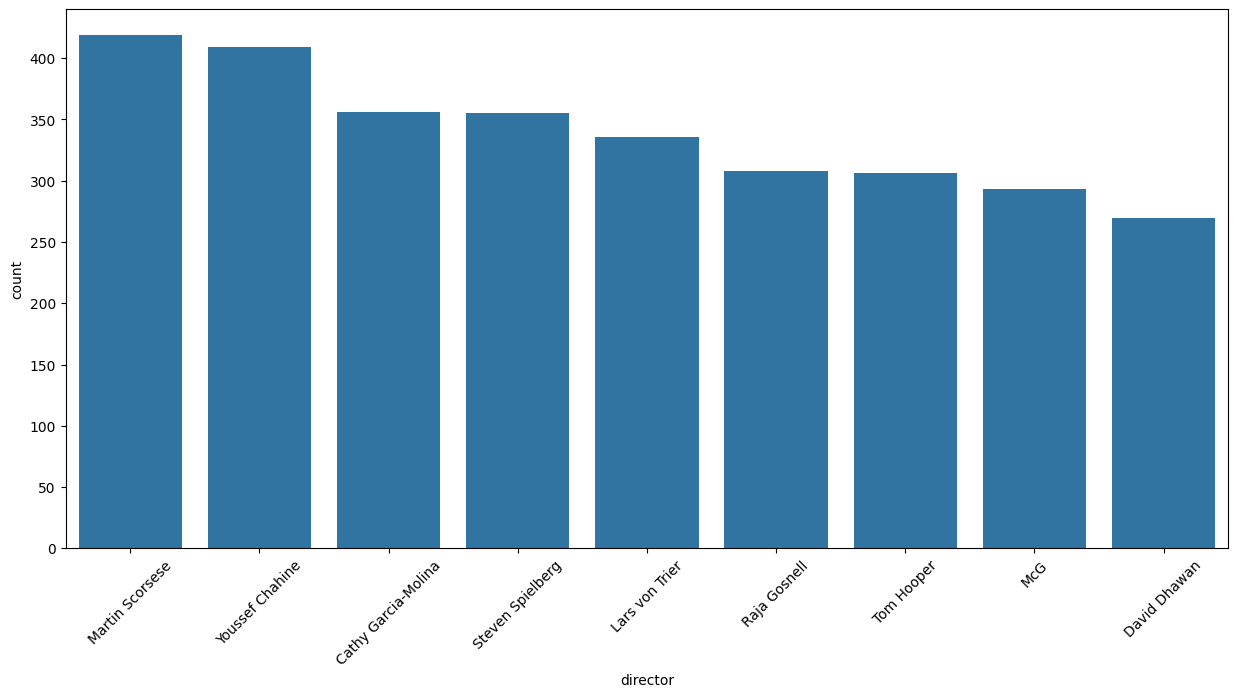

In [43]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45,fontsize=10)
sns.countplot(x='director',data=netflix,order=netflix['director'].value_counts().index[1:10])

<Axes: xlabel='cast', ylabel='count'>

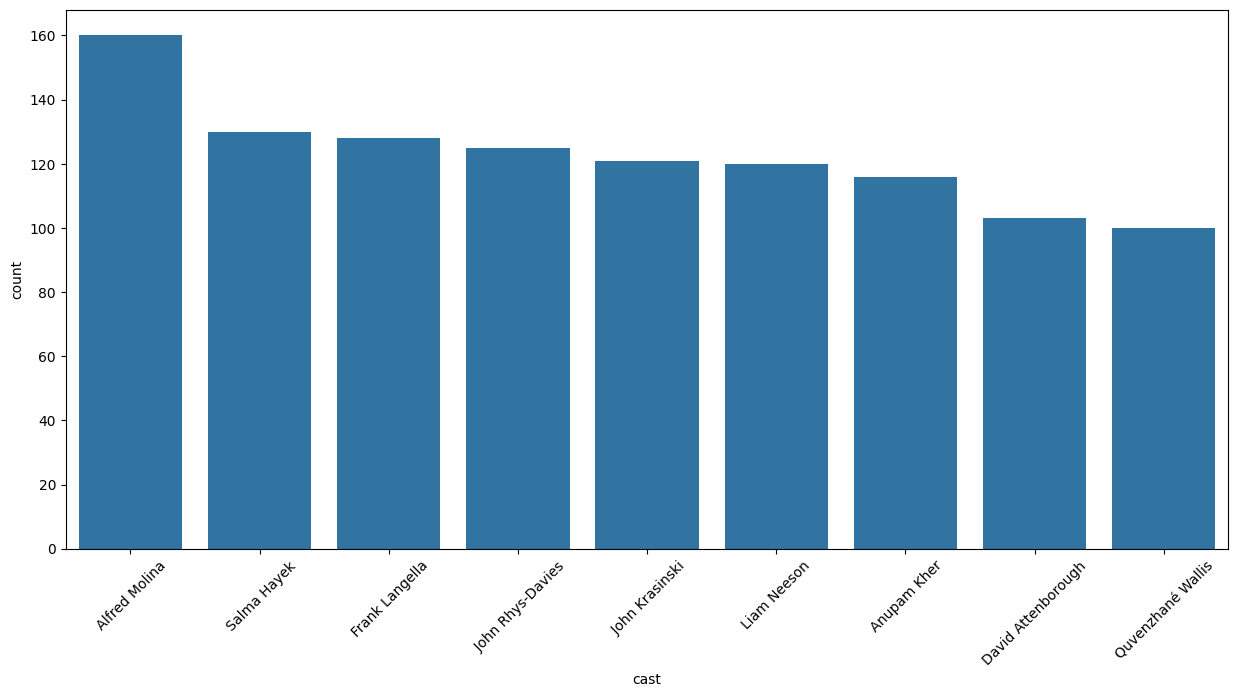

In [44]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45,fontsize=10)
sns.countplot(x='cast',data=netflix,order=netflix['cast'].value_counts().index[1:10])

<Axes: xlabel='listed_in', ylabel='count'>

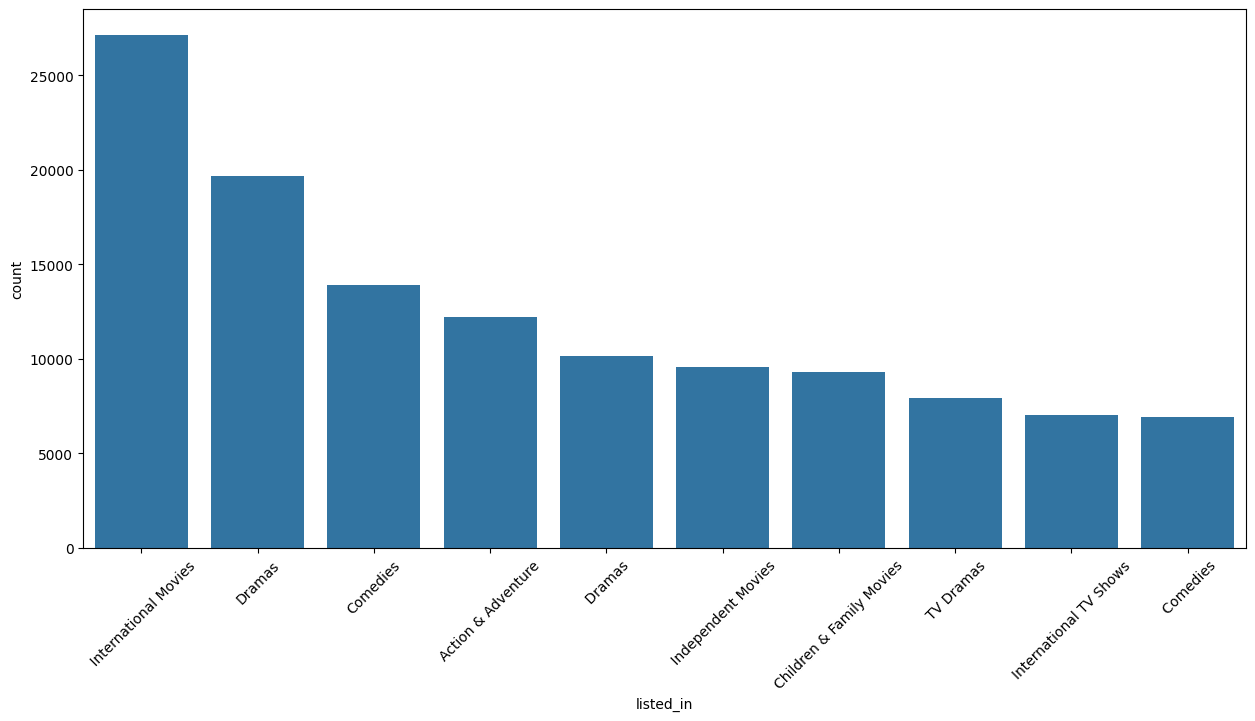

In [45]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45,fontsize=10)
sns.countplot(x='listed_in',data=netflix,order=netflix['listed_in'].value_counts().index[:10])

<Axes: xlabel='release_year', ylabel='count'>

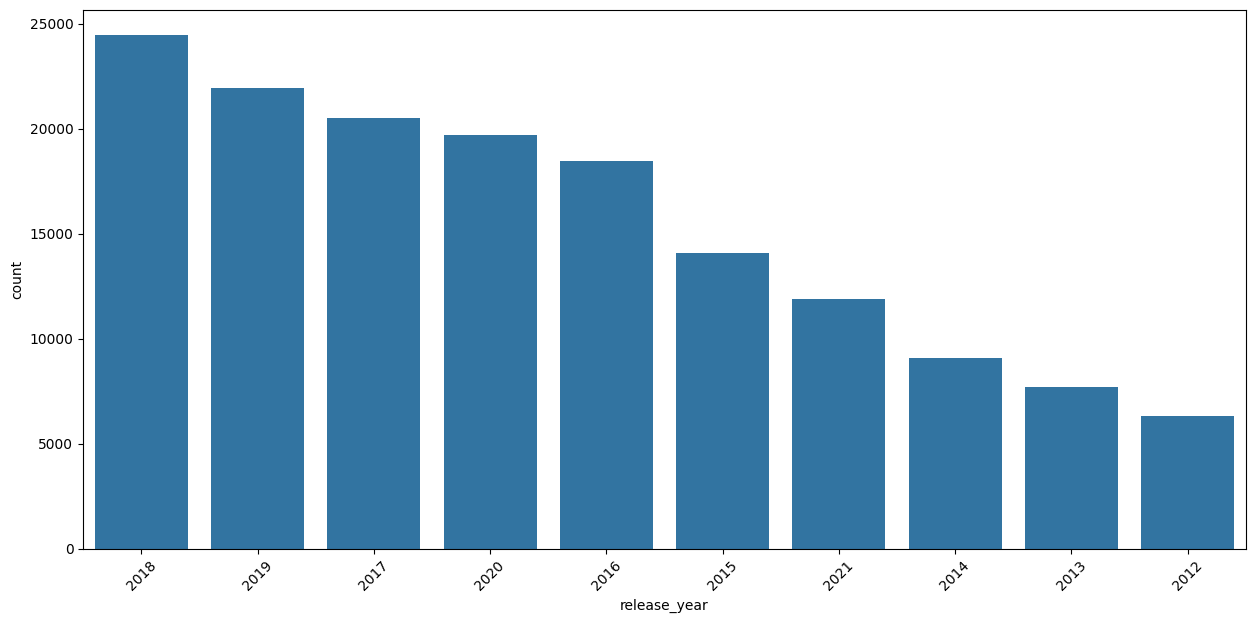

In [46]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45,fontsize=10)
sns.countplot(x='release_year',data=netflix,order=netflix['release_year'].value_counts().index[:10])

# **2. Comparison of tv shows vs. movies.**

# a. Find the number of movies produced in each country and pick the top 10 countries

In [47]:
netflix[netflix['type']=='Movie'].groupby('country')['title'].nunique().sort_values(ascending=False)

,title
country,
United States,2361
India,927
unknown_country,440
United States,388
United Kingdom,382
...,...
Lithuania,1
Liechtenstein,1
Vatican City,1


In [48]:
netflix[netflix['type']=='Movie'].groupby('country')['title'].nunique().sort_values(ascending=False).index[:10]

Index(['United States', 'India', 'unknown_country', ' United States',
       'United Kingdom', 'Canada', ' France', ' United Kingdom', 'France',
       ' Canada'],
      dtype='object', name='country')

# b. Find the number of Tv-Shows produced in each country and pick the top 10 countries


In [49]:
netflix[netflix['type']=='TV Show'].groupby('country')['title'].nunique().sort_values(ascending=False)

,title
country,
United States,841
unknown_country,390
United Kingdom,245
Japan,173
South Korea,164
...,...
Syria,1
Austria,1
Belarus,1


In [50]:
netflix[netflix['type']=='TV Show'].groupby('country')['title'].nunique().sort_values(ascending=False).index[:10]

Index(['United States', 'unknown_country', 'United Kingdom', 'Japan',
       'South Korea', ' United States', 'Canada', 'India', 'Taiwan', 'France'],
      dtype='object', name='country')

# **3. What is the best time to launch a TV show?**

# a. Find which is the best week to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies

In [51]:
netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,unknown_director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
5,s2,TV Show,Blood & Water,unknown_director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
6,s2,TV Show,Blood & Water,unknown_director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
7,s2,TV Show,Blood & Water,unknown_director,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
8,s2,TV Show,Blood & Water,unknown_director,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
9,s2,TV Show,Blood & Water,unknown_director,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."


In [52]:
netflix['date_added']=pd.to_datetime(netflix['date_added'],format='mixed')

In [53]:
netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,unknown_director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
5,s2,TV Show,Blood & Water,unknown_director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
6,s2,TV Show,Blood & Water,unknown_director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
7,s2,TV Show,Blood & Water,unknown_director,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
8,s2,TV Show,Blood & Water,unknown_director,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
9,s2,TV Show,Blood & Water,unknown_director,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."


In [54]:
netflix['week']=netflix['date_added'].dt.strftime('%U')

In [55]:
netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,week
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",38
1,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",38
2,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",38
3,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",38
4,s2,TV Show,Blood & Water,unknown_director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",38
5,s2,TV Show,Blood & Water,unknown_director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",38
6,s2,TV Show,Blood & Water,unknown_director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",38
7,s2,TV Show,Blood & Water,unknown_director,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",38
8,s2,TV Show,Blood & Water,unknown_director,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",38
9,s2,TV Show,Blood & Water,unknown_director,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",38


In [56]:
netflix[netflix['type']=='Movie'].groupby('week')['title'].nunique().sort_values(ascending=False)

,title
week,
00,251
39,241
26,234
13,231
43,204
35,195
08,192
22,180
17,177


# 1st week of the year is the best to launch the movie

In [57]:
netflix[netflix['type']=='TV Show'].groupby('week')['title'].nunique().sort_values(ascending=False)

,title
week,
39,94
31,86
26,84
13,83
27,82
50,77
35,73
24,72
48,69


# 39th week of the year is best to launch the TV show

## b. Find which is the best month to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies

In [58]:
netflix['month']=netflix['date_added'].dt.month

In [59]:
netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,week,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",38,9
1,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",38,9
2,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",38,9
3,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",38,9
4,s2,TV Show,Blood & Water,unknown_director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",38,9
5,s2,TV Show,Blood & Water,unknown_director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",38,9
6,s2,TV Show,Blood & Water,unknown_director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",38,9
7,s2,TV Show,Blood & Water,unknown_director,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",38,9
8,s2,TV Show,Blood & Water,unknown_director,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",38,9
9,s2,TV Show,Blood & Water,unknown_director,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",38,9


In [60]:
netflix[netflix['type']=='Movie'].groupby('month')['title'].nunique().sort_values(ascending=False)

,title
month,
7,565
4,549
12,547
1,546
10,545
3,529
8,518
9,518
11,498


# 7th month of the year is best to launch a Movie

In [61]:
netflix[netflix['type']=='TV Show'].groupby('month')['title'].nunique().sort_values(ascending=False)

,title
month,
12,266
7,262
9,251
6,236
8,236
10,215
4,214
3,213
11,207


# 12th month of the year is best to launch a TV show

# **4. Analysis of actors/directors of different types of shows/movies.**

# a. Identify the top 10 directors who have appeared in most movies or TV shows.

In [62]:
netflix.groupby('director')['title'].nunique().sort_values(ascending=False).head(10)

,title
director,
unknown_director,2624
Rajiv Chilaka,22
Jan Suter,18
Raúl Campos,18
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,15
Cathy Garcia-Molina,13
Jay Chapman,12


## b. Identify the top 10 actors who have appeared in most movies or TV shows.

In [63]:
netflix.groupby('cast')['title'].nunique().sort_values(ascending=False).head(10)

,title
cast,
unknown_cast,825
Anupam Kher,39
Rupa Bhimani,31
Takahiro Sakurai,30
Julie Tejwani,28
Om Puri,27
Rajesh Kava,26
Shah Rukh Khan,26
Yuki Kaji,25


# **5. Which genre movies are more popular or produced more**

In [64]:
netflix.groupby('listed_in')['title'].nunique().sort_values(ascending=False)

,title
listed_in,
International Movies,2624
Dramas,1600
Comedies,1210
Action & Adventure,859
Documentaries,829
...,...
Romantic Movies,3
Spanish-Language TV Shows,2
Sports Movies,1


In [65]:
genres = netflix['listed_in']
all_genres = ' '.join(genres)

In [66]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres)

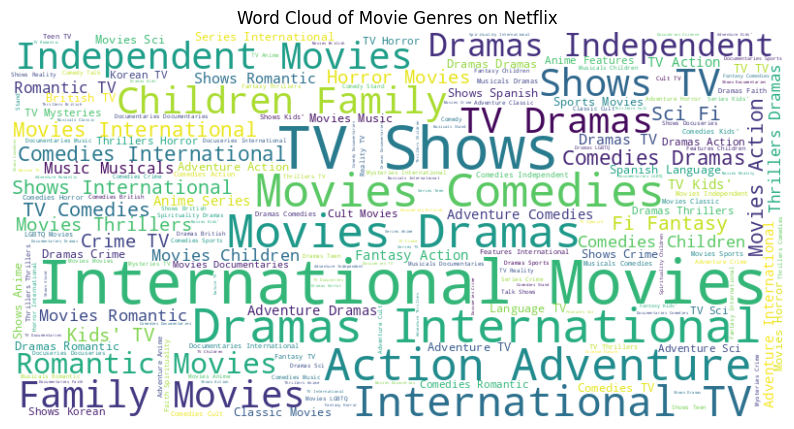

In [67]:
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Genres on Netflix')
plt.show()

# 6. Find After how many days the movie will be added to Netflix after the release of the movie (you can consider the recent past data)

In [68]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201897 entries, 0 to 202057
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       201897 non-null  object        
 1   type          201897 non-null  object        
 2   title         201897 non-null  object        
 3   director      201897 non-null  object        
 4   cast          201897 non-null  object        
 5   country       201897 non-null  object        
 6   date_added    201897 non-null  datetime64[ns]
 7   release_year  201897 non-null  int64         
 8   rating        201897 non-null  object        
 9   duration      201897 non-null  object        
 10  listed_in     201897 non-null  object        
 11  description   201897 non-null  object        
 12  week          201897 non-null  object        
 13  month         201897 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(11)
memory usage: 22.3+ 

In [69]:
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,week,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",38,9
1,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",38,9
2,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",38,9
3,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",38,9
4,s2,TV Show,Blood & Water,unknown_director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",38,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202053,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,08,3
202054,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,08,3
202055,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...,08,3
202056,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,08,3


In [70]:
netflix['release_year']=pd.to_datetime(netflix['release_year'],format='ISO8601')

In [71]:
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,week,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_cast,United States,2021-09-25,2020-01-01,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",38,9
1,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",38,9
2,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",38,9
3,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",38,9
4,s2,TV Show,Blood & Water,unknown_director,Khosi Ngema,South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",38,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202053,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015-01-01,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,08,3
202054,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015-01-01,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,08,3
202055,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015-01-01,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...,08,3
202056,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015-01-01,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,08,3


In [72]:
netflix_recent=netflix[netflix['release_year'].dt.year>2000]

In [73]:
netflix_recent

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,week,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_cast,United States,2021-09-25,2020-01-01,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",38,9
1,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",38,9
2,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",38,9
3,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",38,9
4,s2,TV Show,Blood & Water,unknown_director,Khosi Ngema,South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",38,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202053,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015-01-01,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,08,3
202054,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015-01-01,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,08,3
202055,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015-01-01,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...,08,3
202056,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015-01-01,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,08,3


In [74]:
netflix_recent['days_to_add']=netflix_recent['date_added']-netflix_recent['release_year']

<ipython-input-74-921a3a71add2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_recent['days_to_add']=netflix_recent['date_added']-netflix_recent['release_year']


In [75]:
netflix_recent

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,week,month,days_to_add
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_cast,United States,2021-09-25,2020-01-01,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",38,9,633 days
1,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",38,9,266 days
2,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",38,9,266 days
3,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",38,9,266 days
4,s2,TV Show,Blood & Water,unknown_director,Khosi Ngema,South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",38,9,266 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202053,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015-01-01,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,08,3,1521 days
202054,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015-01-01,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,08,3,1521 days
202055,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015-01-01,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...,08,3,1521 days
202056,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015-01-01,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,08,3,1521 days


In [76]:
netflix_recent['days_to_add']

,days_to_add
0,633 days
1,266 days
2,266 days
3,266 days
4,266 days
...,...
202053,1521 days
202054,1521 days
202055,1521 days
202056,1521 days


In [77]:
netflix_recent['days_to_add'].mode()

,days_to_add
0,547 days


# Adding a movie or TV Show after 547 days is the best time based on the netflix data

# **7.How has the number of movies released per year changed over the last 20-30 years?**


In [78]:
No_of_Movies_by_release_year=netflix[netflix['type']=='Movie'].groupby(netflix['release_year'].dt.year).size()
No_of_TVShow_by_release_year=netflix[netflix['type']=='TV Show'].groupby(netflix['release_year'].dt.year).size()

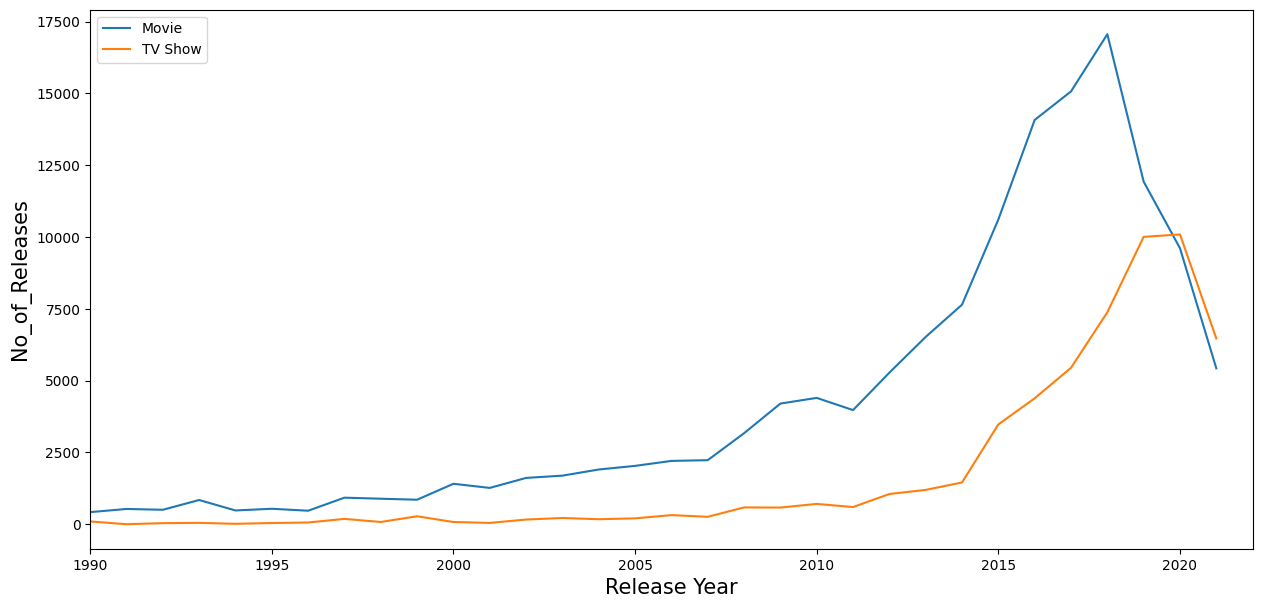

In [79]:
plt.figure(figsize=(15,7))
plt.plot(No_of_Movies_by_release_year.index,No_of_Movies_by_release_year)
plt.plot(No_of_TVShow_by_release_year.index,No_of_TVShow_by_release_year)
plt.xlim(left=1990,right=2022)
plt.xlabel('Release Year',fontsize=15)
plt.ylabel('No_of_Releases',fontsize=15)
plt.legend(['Movie','TV Show'],loc='upper left')

# **8.Does Netflix has more focus on TV Shows than movies in recent years**

Yes. As per the last year data, for the first time TV Shows has reported more releases compared to Movies. ( can be noticed from above graph)

# **Histogram plot for Movies & TV Shows with date_added_year**

In [80]:
netflix_movies=netflix[netflix['type']=='Movie']

<Axes: xlabel='date_added', ylabel='Count'>

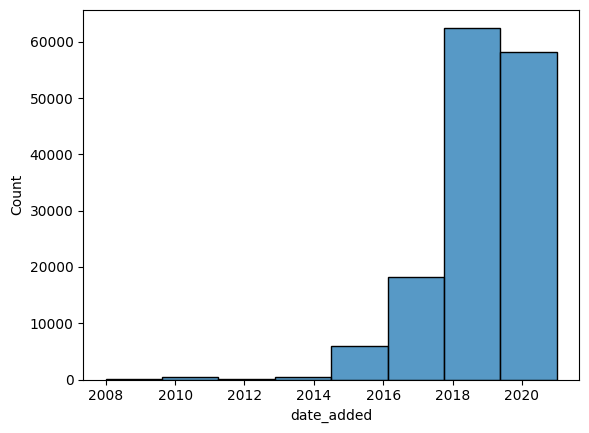

In [81]:
sns.histplot(netflix_movies['date_added'].dt.year,bins=8)

In [82]:
netflix_TVShow=netflix[netflix['type']=='TV Show']

<Axes: xlabel='date_added', ylabel='Count'>

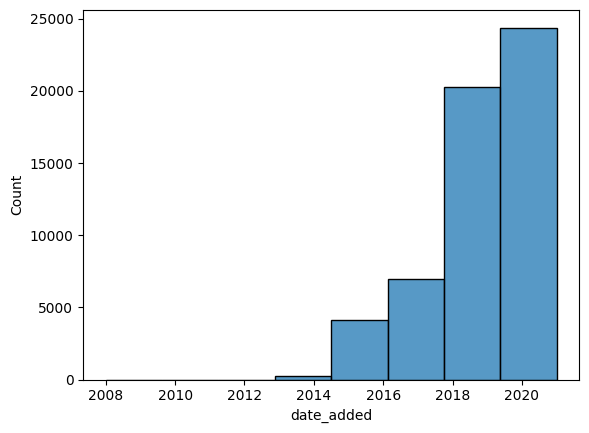

In [83]:
sns.histplot(netflix_TVShow['date_added'].dt.year,bins=8)

# **Box Plot for netflix data where the movies or TV Shows released after 2000**

In [84]:
netflix_recent

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,week,month,days_to_add
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_cast,United States,2021-09-25,2020-01-01,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",38,9,633 days
1,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",38,9,266 days
2,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",38,9,266 days
3,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",38,9,266 days
4,s2,TV Show,Blood & Water,unknown_director,Khosi Ngema,South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",38,9,266 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202053,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015-01-01,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,08,3,1521 days
202054,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015-01-01,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,08,3,1521 days
202055,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015-01-01,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...,08,3,1521 days
202056,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015-01-01,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,08,3,1521 days


In [85]:
netflix_recent['date_added_year']=netflix_recent['date_added'].dt.year

<ipython-input-85-3dcd93f670f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_recent['date_added_year']=netflix_recent['date_added'].dt.year


In [86]:
netflix_recent

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,week,month,days_to_add,date_added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_cast,United States,2021-09-25,2020-01-01,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",38,9,633 days,2021
1,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",38,9,266 days,2021
2,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",38,9,266 days,2021
3,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",38,9,266 days,2021
4,s2,TV Show,Blood & Water,unknown_director,Khosi Ngema,South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",38,9,266 days,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202053,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015-01-01,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,08,3,1521 days,2019
202054,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015-01-01,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,08,3,1521 days,2019
202055,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015-01-01,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...,08,3,1521 days,2019
202056,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015-01-01,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,08,3,1521 days,2019


<Axes: xlabel='type', ylabel='date_added_year'>

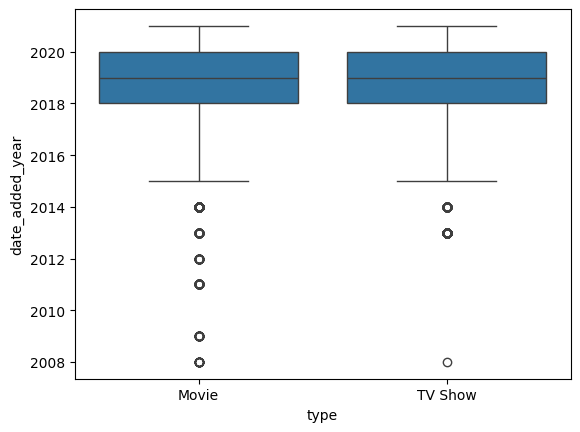

In [87]:
sns.boxplot(y='date_added_year',x='type',data=netflix_recent)

# **Heatmap Plot for ratings in netflix dataset**

In [88]:
netflix_heatmap = netflix[['type','title','rating']]

In [89]:
netflix_heatmap.drop_duplicates(inplace=True)

<ipython-input-89-0266e7d47fb0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_heatmap.drop_duplicates(inplace=True)


In [90]:

heatmap_data = netflix_heatmap.pivot_table(index='type', columns='rating', aggfunc='size')


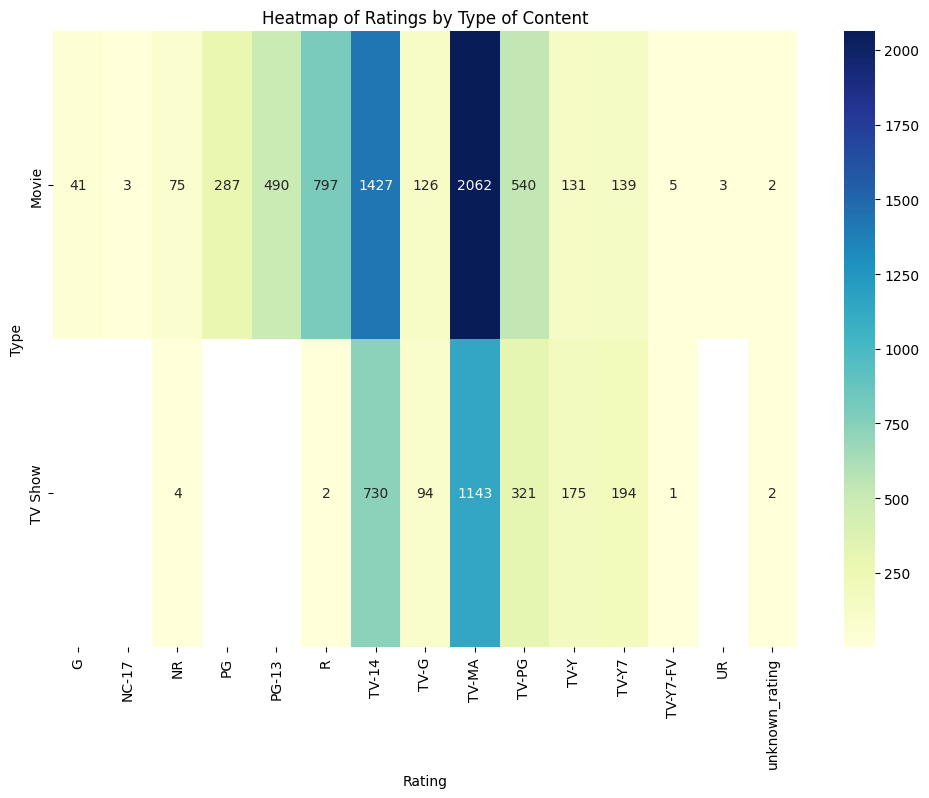

In [91]:
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Heatmap of Ratings by Type of Content')
plt.xlabel('Rating')
plt.ylabel('Type')
plt.show()
